In [1]:
from urllib.request import urlopen
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [2]:
url = urlopen("https://mr.wikipedia.org/wiki/%E0%A4%B5%E0%A4%BE%E0%A4%98")

data = url.read()   #read one time activity
data                #Ctrl + U to see source code

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="mr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>\xe0\xa4\xb5\xe0\xa4\xbe\xe0\xa4\x98 - \xe0\xa4\xb5\xe0\xa4\xbf\xe0\xa4\x95\xe0\xa4\xbf\xe0\xa4\xaa\xe0\xa5\x80\xe0\xa4\xa1\xe0\xa4\xbf\xe0\xa4\xaf\xe0\xa4\xbe</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disable

In [3]:
bsoup = BeautifulSoup(data, 'html.parser')
bsoup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="mr">
<head>
<meta charset="utf-8"/>
<title>‡§µ‡§æ‡§ò - ‡§µ‡§ø‡§ï‡§ø‡§™‡•Ä‡§°‡§ø‡§Ø‡§æ</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disable

In [4]:
bsoup.find('title')

<title>‡§µ‡§æ‡§ò - ‡§µ‡§ø‡§ï‡§ø‡§™‡•Ä‡§°‡§ø‡§Ø‡§æ</title>

In [5]:
text = bsoup.get_text(strip=True)
print(text)

‡§µ‡§æ‡§ò - ‡§µ‡§ø‡§ï‡§ø‡§™‡•Ä‡§°‡§ø‡§Ø‡§æJump to contentMain menuMain menumove to sidebarhide‡§∏‡•Å‡§ö‡§æ‡§≤‡§®‡§Æ‡•Å‡§ñ‡§™‡•É‡§∑‡•ç‡§†‡§ß‡•Ç‡§≥‡§™‡§æ‡§ü‡•Ä‡§ï‡§æ‡§∞‡•ç‡§Ø‡§∂‡§æ‡§≥‡§æ‡§∏‡§æ‡§π‡§æ‡§Ø‡•ç‡§Ø/‡§Æ‡§¶‡§§‡§ï‡•á‡§Ç‡§¶‡•ç‡§∞‡§Ö‡§≤‡•Ä‡§ï‡§°‡•Ä‡§≤ ‡§¨‡§¶‡§≤‡§Ö‡§µ‡§ø‡§∂‡§ø‡§∑‡•ç‡§ü ‡§≤‡•á‡§ñ‡§ö‡§æ‡§µ‡§°‡•Ä‡§¶‡•Ç‡§§‡§æ‡§µ‡§æ‡§∏ (Embassy)‡§ë‡§®‡§≤‡§æ‡§á‡§® ‡§∂‡§¨‡•ç‡§¶‡§ï‡•ã‡§∂‡§¶‡§æ‡§®‡§∂‡•ã‡§ß‡§∂‡•ã‡§ß‡§æAppearance‡§®‡§µ‡•Ä‡§® ‡§ñ‡§æ‡§§‡•á ‡§§‡§Ø‡§æ‡§∞ ‡§ï‡§∞‡§æ‡§™‡•ç‡§∞‡§µ‡•á‡§∂ ‡§ï‡§∞‡§æ(‡§≤‡•â‡§ó ‡§á‡§® ‡§ï‡§∞‡§æ)‡§µ‡•à‡§Ø‡§ï‡•ç‡§§‡§ø‡§ï ‡§∏‡§æ‡§ß‡§®‡•á‡§®‡§µ‡•Ä‡§® ‡§ñ‡§æ‡§§‡•á ‡§§‡§Ø‡§æ‡§∞ ‡§ï‡§∞‡§æ‡§™‡•ç‡§∞‡§µ‡•á‡§∂ ‡§ï‡§∞‡§æ(‡§≤‡•â‡§ó ‡§á‡§® ‡§ï‡§∞‡§æ)Pages for logged out editorslearn more‡§Ø‡•ã‡§ó‡§¶‡§æ‡§®‡§ö‡§∞‡•ç‡§ö‡§æ ‡§™‡§æ‡§®Contentsmove to sidebarhideBeginning‡•ß‡§Ü‡§¢‡§≥ ‡§µ ‡§µ‡§∏‡§§‡§ø‡§∏‡•ç‡§•‡§æ‡§®‡•®‡§µ‡§∞‡•ç‡§£‡§®‡•©‡§™‡•ç‡§∞‡§ú‡•ã‡§§‡•ç‡§™‡§æ‡§¶‡§®‡•™‡§ï‡•ç‡§∑‡•á‡§§‡•ç‡§∞‡§´‡§≥ ‡§∏‡•ç‡§µ‡§æ‡§Æ‡§ø‡§§‡•ç‡§µ‡•´‡§Ü‡§π‡§æ‡§∞ ‡§µ ‡§∂‡§ø‡§ï‡§æ‡§∞‡§™‡§¶‡•ç‡§ß‡§§‡•¨‡§

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\L

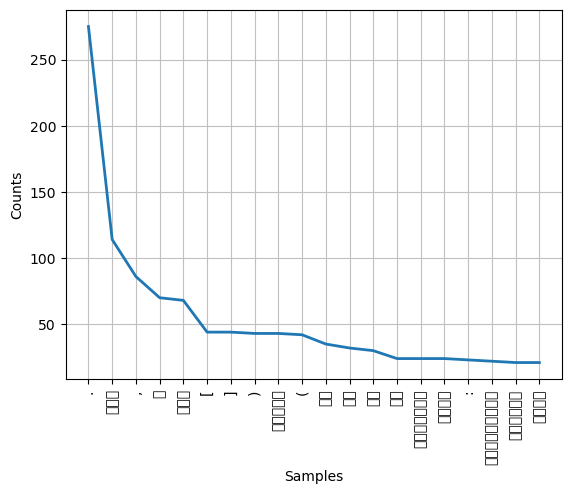

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
tokens = word_tokenize(text)
fdist = FreqDist(tokens)
fdist.plot(20)

In [7]:
wnl = WordNetLemmatizer()
ps  = PorterStemmer()
swords = stopwords.words('marathi')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\sit

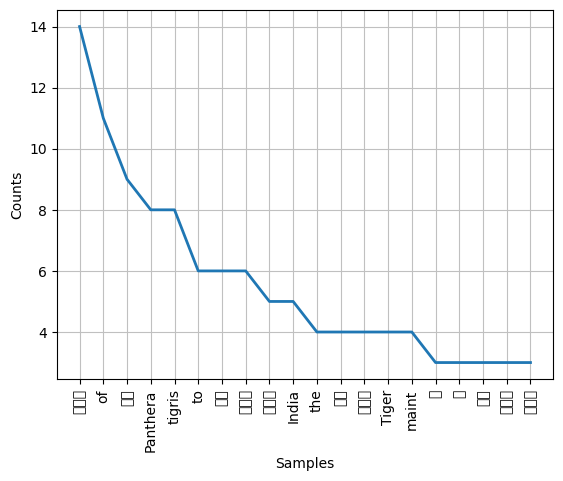

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
#tokens1 = [ps.stem(token) for token in tokens if token.lower() not in swords]  #stemming 
tokens1 = [wnl.lemmatize(token, pos='n') for token in tokens if token not in swords] #lemmatizer
tokens2 = [token for token in tokens1 if token.isalnum()]

fdist = FreqDist(tokens2)
fdist.plot(20)

In [9]:
fdist.most_common(3)

[('‡§á‡§§‡§∞', 14), ('of', 11), ('‡§®‡§∞', 9)]